# Airfare Prediction using Machine Learning

## Table of Contents
1. Problem Definition
2. Data Dictionary
3. Data Understanding
4. Data Cleaning and Preprocessing
5. Exploratory Data Analysis (EDA)<br>
    4.1. When do most of the flights take off?<br>
    4.2. Does the duration of a flight have any impact on airfare?<br>
    4.3. Which is the most common route in Jet Airways?<br>
    4.4. Airline vs Price Analysis<br>
6. Feature Engineering<br>
    5.1. Feature Encoding<br>
     &nbsp; &nbsp; 5.1.1. One-Hot Encoding<br>
     &nbsp; &nbsp; 5.1.2. Target-guided ordinal Encoding<br>
     &nbsp; &nbsp; 5.1.3. Label Encoding<br>
    5.2. Handling Outliers<br>
7. Modeling
8. Deployment

## Problem Definition
Airline ticket prices are influenced by numerous factors, including flight routes, departure and arrival times, airline carriers, and ticket classes. The variability and dynamic nature of these prices present challenges for both travelers seeking the best deals and airlines aiming to optimize revenue.

The goal of this project is to develop a machine learning model that accurately predicts the prices of airline tickets based on historical data provided in the "Flight Price Prediction Dataset." The dataset includes various features such as flight routes, departure and arrival cities, airline carriers, departure and arrival times, and ticket class. By analyzing these features, the model will aim to forecast future ticket prices, providing valuable insights for consumers and aiding airlines in refining their pricing strategies. This project will address the need for accurate airfare predictions and contribute to better decision-making in the travel industry.

## Data Dictionary

The data is downloaded from Kaggle:
https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction

1. `Airline` - Names of the Airlines
2. `Date_of_Journey` - Date of journey of the flight
3. `Source` - Place of departure; starting point; origin
4. `Destination` - Place of arrival
5. `Route` - The path taken from a source to a destination, which may include specific stops along the way
6. `Dep_Time` - Time of departure from a starting point (source)
7. `Arrival_Time` - Time of arrival at a destination
8. `Duration` - Duration of flight from source to destination
9. `Total_Stops` - Total number of stops between source and destination
10. `Additional_Info` - Meals
11. `Price` - Airfare

## Data Understanding

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the train dataset

> Converting `python string` to `raw string` by adding a prefix `r` to the `pd.read_excel()` string.
<br>
> **Reason:** Different operating systems support either `/` or `\` while reading files. With the prefix `r`, we can use both the types of slashes to read the data file.

In [2]:
train_data = pd.read_excel(r'data/Data_Train.xlsx')

### Exploring the dataset

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Data Cleaning and Preprocessing

### Checking for null values

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data['Total_Stops'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Total_Stops, dtype: bool

### Fetching only the null records from the `Total_Stops` feature

In [8]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Fetching only the null records from the `Route` feature

In [9]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Dropping null values

> NaN - Not Available Number

> #### Dropping all the null values because there is only 1 record with null values.

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data.shape

(10682, 11)

In [13]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

> Like `string` in Python, there exists `object` in Pandas.

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


### Finding the exact memory usage of the dataset

In [15]:
train_data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


### Making a copy of the dataset to perform further operations

In [16]:
data = train_data.copy()

In [17]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [19]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Converting `Dep_Time`, `Arrival_Time`, and `Date_of_Journey` features into `timestamp` format

> Machine learning cannot work with string data because it performs by utilizing Linear Algebra, Calculus, and Vectors which never work with string data. <br>
> Hence, we need to convert `object` and `string` to `numeric` or `vector` format.
<br><br>
> `timestamp` formats are of two types in Numpy: `datetime64[ns]` and `<m8[ns]`. <br>
> The 'm' in `<m8[ns]` stands for `datetime`, '8' in bytes which stands for `64` bits. Hence, `<m8[ns]` stands for `datetime64[ns]`. '[ns]' stands for `nano seconds`. <br>
> The format of `timestamp` depends on how the Numpy package is compiled.

> #### Creating a function to avoid repitition of the same Lines of Code (LOC).

In [20]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

> Ignoring warnings that may appear in the later LOC

In [21]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
    change_into_Datetime(feature)

In [24]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### Splitting the `Date_of_Journey` feature into derived attributes/features: `Journey_Day`, `Journey_Month`, and `Journey_Year`

> Utilizing the `dt` accessor from pandas in order to access the `datetime` properties of `day`, `month`, and `year`

In [25]:
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data['Journey_Year'] = data['Date_of_Journey'].dt.year

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


### Extracting derived attributes from `Dep_Time` and `Arrival_Time` features as `Dep_Time_Hour`, `Dep_Time_Minute`, `Arrival_Time_Hour`, and `Arrival_Time_Minute`

In [27]:
def extract_hour_min(df, col):
    df[col+'_Hour'] = df[col].dt.hour
    df[col+'_Minute'] = df[col].dt.minute
    return df.head(3)

In [28]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month',
       'Journey_Year'],
      dtype='object')

In [29]:
extract_hour_min(data, 'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-08 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [30]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-08-08 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-08-08 05:50:00,2024-08-08 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-08-08 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


### Dropping `Dep_Time` and `Arrival_Time` features because derived attributes have been extracted from them and hence they are of no use.

In [31]:
cols_to_drop = ['Dep_Time', 'Arrival_Time']

data.drop(cols_to_drop, axis=1, inplace=True)

> `axis=1` refers to the column of the dataframe <br>
> `axis=0` refers to the row of the dataframe

In [32]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [33]:
data.shape

(10682, 16)

## Exploratory Data Analysis (EDA)

### When do most of the flights take off?

In [34]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute'],
      dtype='object')

#### Defining a function to breakdown `Dep_Time_Hour` into different parts of the day
1. **Early Morning:** 5:00 AM - 8:00 AM
2. **Morning:** 8:00 AM - 12:00 PM
3. **Afternoon:** 12:00 PM - 3:00 PM
4. **Late Afternoon:** 3:00 PM - 6:00 PM
5. **Evening:** 6:00 PM - 9:00 PM
6. **Night:** 9:00 PM - 12:00 AM
7. **Midnight:** 12:00 AM - 1:00 AM
8. **Late Night:** 1:00 AM - 4:00 AM

In [35]:
def flight_dep_time(x):
    if(x>5) and (x<=8):
        return 'Early Morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=15):
        return 'Afternoon'
    elif(x>15) and (x<=18):
        return 'Late Afternoon'
    elif(x>18) and (x<=21):
        return 'Evening'
    elif(x>21) and (x<=24):
        return 'Night'
    elif(x>24) and (x<=1):
        return 'Midnight'
    else:
        return 'Late Night'

#### Applying the `flight_dep_time` function to the `Dep_Time_Hour` feature

In [36]:
data['Dep_Time_Hour'].apply(flight_dep_time).head(6)

0             Night
1        Late Night
2           Morning
3    Late Afternoon
4    Late Afternoon
5           Morning
Name: Dep_Time_Hour, dtype: object

#### Counting the frequencies of `Dep_Time_Hour`

In [37]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts()

Dep_Time_Hour
Early Morning     2251
Morning           2209
Evening           1710
Late Afternoon    1611
Afternoon         1259
Late Night        1094
Night              548
Name: count, dtype: int64

#### Plotting the frequencies into a bar plot

<Axes: xlabel='Dep_Time_Hour'>

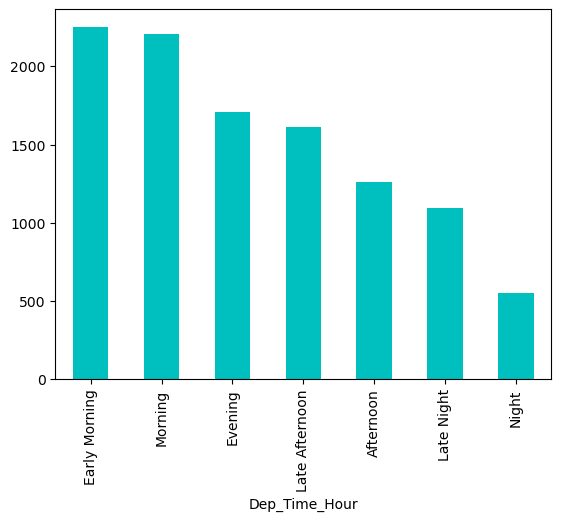

In [38]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='c')

#### Utilizing plotly to create an interactive plot of the `Dep_Time_Hour` frequencies

In [39]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

In [40]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

>- `go_offline` from `cufflinks.offline` is required to set the plotly plot for offline access within the Jupyter notebook.
>- `plot` helps to create matplotlib like visualizations. Creates Plotly plot as an HTML file. It renders the plot offline.
>- `iplot` helps to create interactive visualizations (creates javascript plot). Specifically designed for use in Jupyter notebook.
>- `init_notebook_mode(connected=True)` helps to initialize the interactive plotting mode in the Jupyter notebook. By setting `connected=True`, plots will be rendered using the Plotly cloud service, which allows for interactive features and better rendering. If set to `connected=False`, the plots will be rendered locally without connecting to Plotly's cloud service.
>- `cf.go_offline()` helps to render plots locally within the environment where the code is executed (Jupyter notebook) without requiring an internet connection.

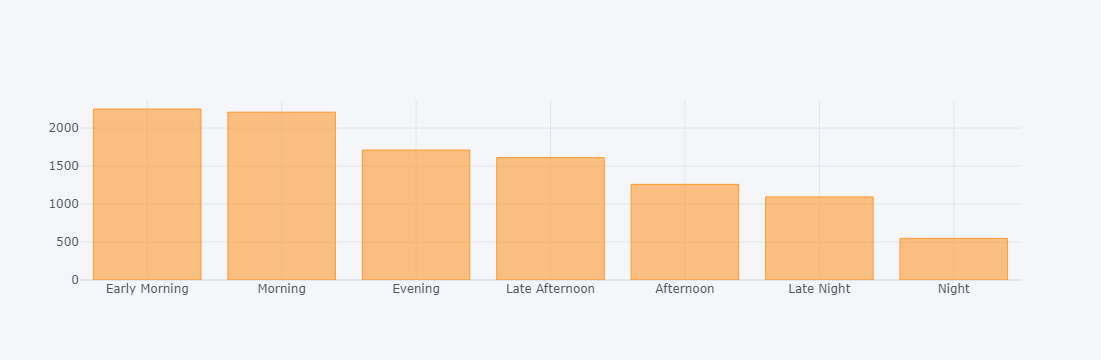

In [41]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

### Does the duration of a flight have any impact on airfare?

#### Data Preprocessing on the `Duration` feature

In [42]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [43]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_Day                     int32
Journey_Month                   int32
Journey_Year                    int32
Dep_Time_Hour                   int32
Dep_Time_Minute                 int32
Arrival_Time_Hour               int32
Arrival_Time_Minute             int32
dtype: object

#### Converting the `Duration` feature from `object` to `numeric` data type
> Some records contain both `hours` and `minutes`, but some contain only one. It is necessary to make these records consistent to convert the `Duration` feature to a numeric form. Hence, all the records will be changed to `hours` and `minutes`.

#### Defining a function to normalize the `Duration` feature
> The goal is to normalize all the records in the form: `0h 0m`.<br>
> Hence, records with only `0h` will be appended with `0m` at the end, and records with only `0m` will be appended with `0h` in the front.

In [44]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'
    return x

#### Applying the function to the `Duration` feature

In [45]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [46]:
data['Duration'].head()

0    2h 50m
1    7h 25m
2    19h 0m
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

#### Extracting derived attributes from the `Duration` feature as `Duration_Hours` and `Duration_Mins`

- Using `split()` to extract derived attributes
- Using positive indexing and negative indexing to access the numeric values of the string
> How negative indexing works: <br>
> Example: <br><br>
> Positive Indexing: <br>
> `D u r a t i o n` <br>
> `0 1 2 3 4 5 6 7` <br><br>
> Negative Indexing: <br>
> ` D  u  r  a  t  i  o  n` <br>
> `-8 -7 -6 -5 -4 -3 -2 -1`

In [47]:
data['Duration'][0]

'2h 50m'

In [48]:
data['Duration'][0].split(' ')

['2h', '50m']

In [49]:
data['Duration'][0].split(' ')[0]

'2h'

In [50]:
data['Duration'][0].split(' ')[1]

'50m'

> Accessing only the numeric value by excluding the string `h` or `m` using: <br>
> `[0:-1]`, where Python excludes the index `-1` and only includes the indexes `[0:]`.

In [51]:
data['Duration'][0].split(' ')[0][0:-1]

'2'

In [52]:
data['Duration'][0].split(' ')[1][0:-1]

'50'

> Using `type()` to check the data type

In [53]:
type(data['Duration'][0].split(' ')[0][0:-1])

str

> Since the data type of the extracted numeric value is `string`, `int()` function will be used to convert it to integer.

In [54]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [55]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

#### Creating and applying lambda function to the `Duration` feature in order to extract the derived attributes

> The `x` in the lambda function will be treated as a pointer to each row/record in the `Duration` feature.

In [56]:
data['Duration_Hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [57]:
data['Duration_Mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [58]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [59]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_Day                     int32
Journey_Month                   int32
Journey_Year                    int32
Dep_Time_Hour                   int32
Dep_Time_Minute                 int32
Arrival_Time_Hour               int32
Arrival_Time_Minute             int32
Duration_Hours                  int64
Duration_Mins                   int64
dtype: object

#### Converting the values in the `Duration` feature from hours to minutes

> The current form of values in the `Duration` feature is `0h 0m` <br><br>
> `0h 0m` can be converted to minutes as follows: <br>
> `0h*60 + 0m*1`
> <br><br>
> How it will be implemented: <br>
> `h` will be replaced with `*60`, and <br>
> `m` will be replaced with `*1`
> <br><br>
> However, the `Duration` feature is of the datatype `object` or `string`. Hence, the `eval()` function can be utilized to perform arithmetic operations on string values.

In [60]:
'2*60'

'2*60'

In [61]:
eval('2*60')

120

In [62]:
data['Duration'].head(6)

0    2h 50m
1    7h 25m
2    19h 0m
3    5h 25m
4    4h 45m
5    2h 25m
Name: Duration, dtype: object

> Utilizing the `str` accessor and the `replace` function to replace specific characters from the string values in the `Duration` feature:<br>
> `'h'` -> `'*60'`<br>
> `' '` -> `'+'`<br>
> `'m'` -> `'*1'`
>
> Finally storing it in `Duration_Total_Mins`

In [63]:
data['Duration_Total_Mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1')

In [64]:
data['Duration_Total_Mins'].head(6)

0    2*60+50*1
1    7*60+25*1
2    19*60+0*1
3    5*60+25*1
4    4*60+45*1
5    2*60+25*1
Name: Duration_Total_Mins, dtype: object

> Applying the `eval()` function to perform arithmetic operations on the string values

In [65]:
data['Duration_Total_Mins'] = data['Duration_Total_Mins'].apply(eval)

In [66]:
data['Duration_Total_Mins'].head(6)

0     170
1     445
2    1140
3     325
4     285
5     145
Name: Duration_Total_Mins, dtype: int64

In [67]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Duration_Total_Mins'],
      dtype='object')

#### Creating a scatter plot to visualize the impact of flight duration on airfare

<Axes: xlabel='Duration_Total_Mins', ylabel='Price'>

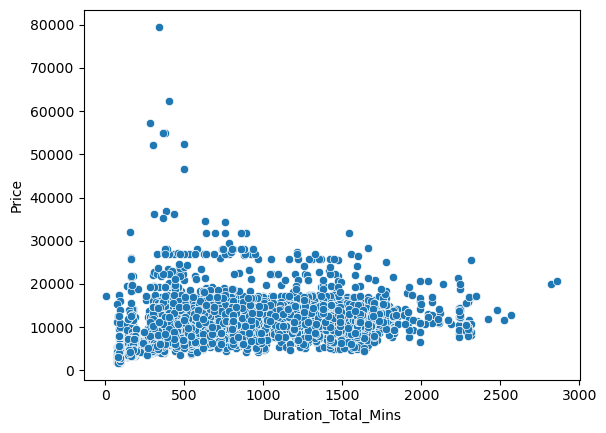

In [68]:
sns.scatterplot(x='Duration_Total_Mins', y='Price', data=data)

#### Visualizing the same scatter plot with a hue of `Total_Stops` feature

<Axes: xlabel='Duration_Total_Mins', ylabel='Price'>

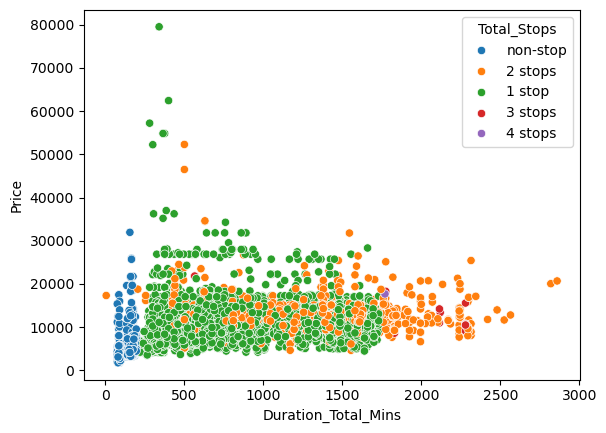

In [69]:
sns.scatterplot(x='Duration_Total_Mins', y='Price', hue='Total_Stops', data=data)

#### Visualizing the same using regression plot with a best-fit line

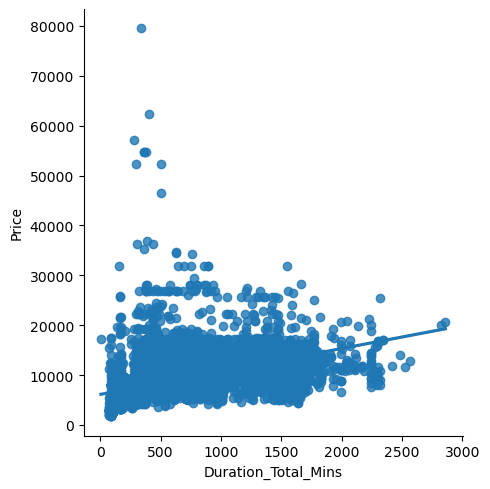

In [70]:
sns.lmplot(x='Duration_Total_Mins', y='Price', data=data)

> The best-fit line on the regression plot, clearly increases, inferring that as the flight duration increases, the price or the airfare also increases.

### Which is the most common route in Jet Airways?

In [71]:
data['Airline'].head(6)

0         IndiGo
1      Air India
2    Jet Airways
3         IndiGo
4         IndiGo
5       SpiceJet
Name: Airline, dtype: object

In [72]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [73]:
data[data['Airline'] == 'Jet Airways'].head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins,Duration_Total_Mins
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5,21,5,1265
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25,25,30,1530


In [74]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

### Airline vs Price Analysis

In [75]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Duration_Total_Mins'],
      dtype='object')

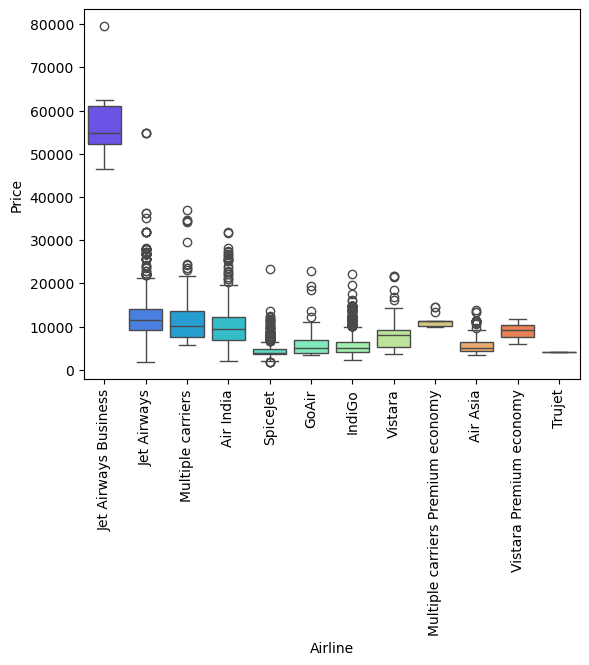

In [76]:
sns.boxplot(x='Airline', y='Price', data=data.sort_values('Price', ascending=False), palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

## Feature Engineering
> The process of transforming variables or features into a format suitable for modeling

### Feature Encoding

> Feature encoding is the process of converting categorical features into numerical features. <br>
> Since Machine Learning algorithms can only work with numbers and vectors, it is necessary to convert categorical features into numeric ones before performing Machine Learning modeling for prediction.

### One-Hot Encoding

> The process of splitting categorical feature values (values with `object` or `string` data type) into separate features of their own, and representing their values with either 0 (meaning the record does not have that feature) or 1 (meaning the record has the feature).<br><br>
> **For example** - If the feature contains 100 different categories, performing One Hot Encoding will lead to `the curse of dimensionality`, because it will create 100 different features leading to high-dimensional spaces.

### Rules of Feature engineering generally followed in the real world
> - `One Hot encoding` is performed on a dataset feature, given that the feature contains `nominal data` (data that has no order).
> - `Label encoding` is performed on a dataset feature, given that the feature contains `ordinal data` (data that has an order).
<br><br>
> - `Label encoding` assigns a unique numerical value to each category, while `one-hot encoding` creates binary columns for each category.

### The Curse of Dimensionality
> The curse of dimensionality is a phenomenon that occurs when analyzing and organizing data in high-dimensional spaces. It can lead to challenges like increased computational efforts, more training data requirements, and difficulty in supervised machine learning.

In [77]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins,Duration_Total_Mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


#### Creating two lists to perform feature engineering
> - The first list will be `cat_col` which contains all the categorical features (features with values of datatype `object`). So that, `feature encoding` can be performed on the list.
> - The second list will be `num_col` which contains all the numerical features (features with values of datatype `numeric`).

In [78]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Duration_Total_Mins'],
      dtype='object')

In [79]:
[col for col in data.columns if data[col].dtype == 'object']

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

> The above code is similar to the code below

In [80]:
cat_col = []
for col in data.columns:
    if data[col].dtype == 'object':
        cat_col.append(col)

In [81]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

##### Storing the list with `object` and `without object` values in `cat_col` and `num_col` respectively

> Writing the same code in a single line.

In [82]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']

In [83]:
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [84]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [85]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_Day',
 'Journey_Month',
 'Journey_Year',
 'Dep_Time_Hour',
 'Dep_Time_Minute',
 'Arrival_Time_Hour',
 'Arrival_Time_Minute',
 'Duration_Hours',
 'Duration_Mins',
 'Duration_Total_Mins']

### Feature encoding on the `Source` feature

In [86]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

#### Performing "One Hot Encoding" manually on all the categories present in the `Source` feature
> Implementing "One Hot Encoding" on the `Source` feature because it is categorical.

##### Implementing "One Hot Encoding" for each of the sub-categories in the `Source` feature

In [87]:
data['Source'].apply(lambda x: 1 if x=='Bangalore' else 0).head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: Source, dtype: int64

##### Implementing "One Hot Encoding" for all the sub-categories in the `Source` feature using a `for loop`

In [88]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x: 1 if x==sub_category else 0)

In [89]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,...,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins,Duration_Total_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,13,15,7,25,445,0,1,0,0,0


### Feature encoding on the `Airline` feature

In [90]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

#### Checking the number of unique values in the `Airline` feature

In [91]:
data['Airline'].nunique()

12

> Performing `One Hot Encoding` on the `Airline` feature would result in `the curse of dimensionality`, because it would create 12 different features, increasing the dimensions of the dataset. Another method would be to create `Target-guided ordinal encoding`.

#### Performing Target-guided ordinal encoding on the `Airline` feature
> Target-guided ordinal encoding is a technique used to encode categorical features based on their target feature (`Price` in this case).<br>
> This encoding technique is particularly useful when the target variable (`Price` in this case) is `ordinal` (data that has an order).<br><br>
> This technique would create a single feature by prioritizing the sub-categories based on their target feature (`price` in this case) and encoding them.<br><br>
> Since there are 12 sub-categories or airlines in the `Airline` feature, all the airlines will be prioritized based on the average `Price` value.<br>
> The higher the average price of an airline, the higher its priority value.

In [92]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

##### Storing the mean price sorted airlines in a variable named `airlines`

In [93]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [94]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

#### Converting the list `airlines` into a dictionary to provide priority values for each of the sorted airlines
> Using `enumeration` to assign numeric values for the sorted airlines.

> Dictionary = {key : value}

In [95]:
dict_airlines = {}
for index, key in enumerate(airlines, 0):
    dict_airlines[key] = index

In [96]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

##### Writing the same code in a single line

In [97]:
dict_airlines = {key:index for index, key in enumerate(airlines, 0)}

In [98]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

#### Mapping the `dict_airlines` dictionary on top of the `Airline` feature

In [99]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [100]:
data['Airline'].head(6)

0     3
1     7
2    10
3     3
4     3
5     1
Name: Airline, dtype: int64

### Feature Encoding on the `Destination` feature

In [101]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [102]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

> It was found out that `New Delhi` and `Delhi` have the same airport, hence, `New Delhi` will be replaced with `Delhi` to reduce high dimensionality.

#### Replacing `New Delhi` with `Delhi`

In [103]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [104]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

#### Performing Target-guided ordinal encoding on the `Destination` feature

In [105]:
data.groupby(['Destination'])['Price'].mean().sort_values()

Destination
Kolkata       4789.892388
Hyderabad     5059.708752
Delhi         8017.464269
Banglore      9158.389411
Cochin       10540.113536
Name: Price, dtype: float64

In [106]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [107]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

#### Creating a dictionary to store the priority values of the sorted destinations.

In [108]:
dict_dest = {key:index for index, key in enumerate(dest, 0)}

In [109]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

#### Mapping the dictionary `dict_dest` onto the `Destination` feature

In [110]:
data['Destination'] = data['Destination'].map(dict_dest)

In [111]:
data['Destination'].head(6)

0    2
1    3
2    4
3    3
4    2
5    3
Name: Destination, dtype: int64

In [112]:
data.head(6).T

,0,1,2,3,4,5
Airline,3,7,10,3,3,1
Date_of_Journey,2019-03-24 00:00:00,2019-05-01 00:00:00,2019-06-09 00:00:00,2019-05-12 00:00:00,2019-03-01 00:00:00,2019-06-24 00:00:00
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore,Kolkata
Destination,2,3,4,3,2,3
Route,BLR → DEL,CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,CCU → NAG → BLR,BLR → NAG → DEL,CCU → BLR
Duration,2h 50m,7h 25m,19h 0m,5h 25m,4h 45m,2h 25m
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop,non-stop
Additional_Info,No info,No info,No info,No info,No info,No info
Price,3897,7662,13882,6218,13302,3873
Journey_Day,24,1,9,12,1,24


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  int64         
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  int64         
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Journey_Day          10682 non-null  int32         
 10  Journey_Month        10682 non-null  int32         
 11  Journey_Year         10682 non-null  int32         
 12  Dep_Time_Hour        10682 non-null  int32         
 13  Dep_Time_Minute      10682 non-null 

### Feature encoding on the `Total_Stops` feature

In [114]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

> Since the `Total_Stops` feature contains ordinal data values or ordinal sub-categories, `Label encoding` will be performed on it.

#### Performing Label Encoding on the `Total_Stops` feature
> Label Encoding assigns a unique numerical value to each category, unlike one-hot encoding, which creates binary columns for each category.<br>
> Label Encoding only works on ordinal data.

#### Creating a dictionary named `stop` with numeric values assigned in order to map the dictionary to the `Total_Stops` feature
> dictionary = **{key : value}**

In [115]:
stop = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

In [116]:
stop

{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}

#### Mapping the dictionary `stop` onto the `Total_Stops` feature

In [117]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [118]:
data['Total_Stops'].head(6)

0    0
1    2
2    2
3    1
4    1
5    0
Name: Total_Stops, dtype: int64

### Removing unecessary features before data modeling

In [119]:
data.head(2).T

,0,1
Airline,3,7
Date_of_Journey,2019-03-24 00:00:00,2019-05-01 00:00:00
Source,Banglore,Kolkata
Destination,2,3
Route,BLR → DEL,CCU → IXR → BBI → BLR
Duration,2h 50m,7h 25m
Total_Stops,0,2
Additional_Info,No info,No info
Price,3897,7662
Journey_Day,24,1


In [120]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Duration_Total_Mins', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [121]:
data['Additional_Info'].head(6)

0    No info
1    No info
2    No info
3    No info
4    No info
5    No info
Name: Additional_Info, dtype: object

In [122]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [123]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

#### Checking the percentage of distribution of each category in the `Additional_Info` feature

In [124]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

> 78% of values in the `Additional_Info` feature are `No info`.<br>
> Hence, it is reasonable to remove this feature from the dataset as it will have little to no impact in the modeling accuracy.

In [125]:
data['Journey_Year'].unique()

array([2019])

#### Features to drop
>- `Additional_Info` - because most of its values (78%) are "No info".
>- `Route` - because the `Total_Stops` and the `Route` features contain the same information. `Route` shows the name of the stops which is of no use in data modeling.
>- `Source` - because "One-Hot Encoding" was performed on this feature.
>- `Duration_Total_Mins` - because there exists `Duration_Hours` and `Duration_Mins` features.
>- `Duration` - because attributes were derived from it as `Duration_Hours` and `Duration_Mins`.
>- `Date_of_Journey` - because there exists, `Journey_Day`, `Journey_Month`, and `Journey_Year` features.
>- `Journey_Year` - because the feature contains a constant value which makes no sense for a machine learning model that expects varying values. It could however make sense for Data Analysis but not for ML modeling.

In [126]:
data.drop(columns = ['Additional_Info', 'Route', 'Source', 'Duration_Total_Mins', 'Duration', 'Date_of_Journey', 'Journey_Year'], axis=1, inplace=True)

> `axis=1` refers to the column of the dataframe <br>
> `axis=0` refers to the row of the dataframe

In [127]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_Day',
       'Journey_Month', 'Dep_Time_Hour', 'Dep_Time_Minute',
       'Arrival_Time_Hour', 'Arrival_Time_Minute', 'Duration_Hours',
       'Duration_Mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [128]:
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


### Finding Outliers

#### Creating a plot with three sub-plots of distribution plot, box plot, and histogram plot
> These three subplots help in identifying outliers in the data.

In [135]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1) # 3 rows, 1 column

    sns.distplot(x = df[col], ax = ax1)
    sns.boxplot(x = df[col], ax = ax2)
    sns.histplot(x = df[col], ax = ax3)

#### Calling the function to find outliers in the `Price` feature

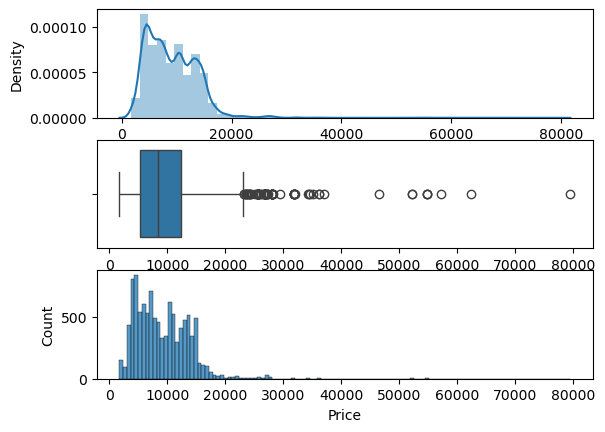

In [136]:
plot(data, 'Price')

#### Defining `Q1`, `Q2`, `Inter Quartile Range (IQR)`, `Maximum`, and `Minimum`

In [138]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

In [146]:
print(f"Maximum Price = {maximum}")
print(f"Minimum Price = {minimum}")
print(f"Lower quartile = {q1}")
print(f"Upper quartile = {q3}")
print(f"Inter quartile range (IQR) = {iqr}")

Maximum Price = 23017.0
Minimum Price = -5367.0
Lower quartile = 5277.0
Upper quartile = 12373.0
Inter quartile range (IQR) = 7096.0


> Any data point that is less than the `Minimum Price` or greater than the `Maximum Price` will be considered as **outliers**

#### Printing a list of all the outliers in the target variable `Price`

In [150]:
print([price for price in data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


#### Finding how many outliers are present using the `len()` function

In [151]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

#### Replacing all the outliers with the `median` value of `Price`.
> Not using `Mean` because outliers influence the `Mean` value. Changing the outliers will change the Mean.

> Some Domain experts suggested to consider the threshold value as `35k` or `35000` instead of the calculated `maximum` value for outliers. Hence, `35000` will be considered as the threshold value and any value beyond this threshold will be an outlier.

In [162]:
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

#### Plot after removing the outliers

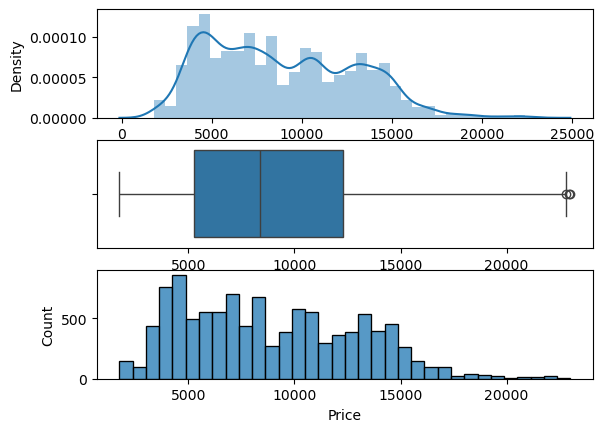

In [163]:
plot(data, 'Price')